<a href="https://colab.research.google.com/github/RamirezCazaresCristianOmar/M-todos-Num-ricos-1/blob/main/Polinomio_Interpolante_de_Newton_con_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sympy import Symbol, expand, simplify, Matrix
from sympy.plotting import plot
import matplotlib.pyplot as plt

Polinomio de interpolación de Newton:
x**3 - 2*x**2 + 7*x - 5

Tabla de Diferencias Divididas:
xi		f[xi]		f[x0,...,x1]	f[x0,...,x2]	f[x0,...,x3]	f[x0,...,x4]	f[x0,...,x5]	
0		-5.000000		6.000000		1.000000		1.000000		0.000000		0.000000		
1		1.000000		8.000000		4.000000		1.000000		0.000000		
2		9.000000		16.000000		7.000000		1.000000		
3		25.000000		30.000000		10.000000		
4		55.000000		50.000000		
5		105.000000		

Valor del polinomio en x = 2.5: 15.625


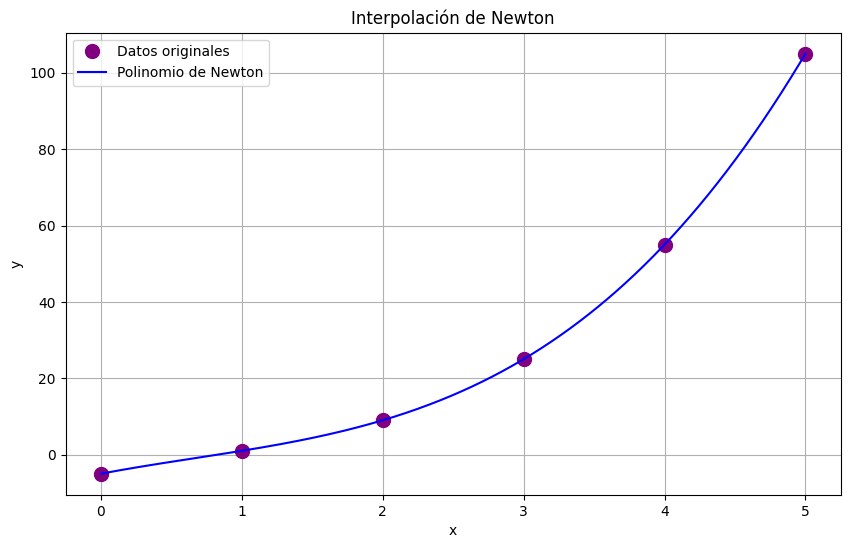

In [4]:

def diferencias_divididas(x, y):
    """
    Calcula la tabla de diferencias divididas para el método de Newton.

    Parámetros:
    x: Lista de valores x (abscisas)
    y: Lista de valores y (ordenadas)

    Retorna:
    Matrix: Tabla de diferencias divididas
    """
    n = len(x)
    tabla = Matrix.zeros(n, n)

    # Primera columna: valores de y
    for i in range(n):
        tabla[i, 0] = y[i]

    # Calcular diferencias divididas
    for j in range(1, n):
        for i in range(n - j):
            tabla[i, j] = (tabla[i + 1, j - 1] - tabla[i, j - 1]) / (x[i + j] - x[i])

    return tabla

def polinomio_newton(x, y):
    """
    Construye el polinomio de interpolación de Newton.

    Parámetros:
    x: Lista de valores x
    y: Lista de valores y

    Retorna:
    - Polinomio de interpolación (expresión simbólica)
    - Tabla de diferencias divididas
    """
    if len(x) != len(y):
        raise ValueError("Las listas x e y deben tener la misma longitud")

    # Calcular tabla de diferencias divididas
    tabla = diferencias_divididas(x, y)

    # Variable simbólica para el polinomio
    t = Symbol('x')
    n = len(x)

    # Construir el polinomio
    polinomio = tabla[0, 0] # Primer término
    termino = 1

    for i in range(1, n):
        termino *= (t - x[i-1])
        polinomio += tabla[0, i] * termino

    return simplify(expand(polinomio)), tabla

def mostrar_tabla(tabla, x):
    """
    Muestra la tabla de diferencias divididas de forma formateada.

    Parámetros:
    tabla: Matriz con la tabla de diferencias divididas
    x: Lista de valores x
    """
    n = len(x)
    print("\nTabla de Diferencias Divididas:")
    print("xi\t\tf[xi]\t\t", end="")

    for i in range(1, n):
        print(f"f[x0,...,x{i}]\t", end="")
    print()

    for i in range(n):
        print(f"{x[i]}\t\t", end="")
        for j in range(n-i):
            valor = tabla[i, j]
            if abs(valor) < 1e-10: # Manejar valores muy cercanos a cero
                valor = 0
            print(f"{valor:.6f}\t\t", end="")
        print()

def graficar_newton(x, y, polinomio, titulo="Interpolación de Newton"):
    """
    Grafica los puntos originales y el polinomio de Newton.

    Parámetros:
    x: Lista de valores x
    y: Lista de valores y
    polinomio: Polinomio de interpolación (expresión simbólica)
    titulo: Título del gráfico
    """
    plt.figure(figsize=(10, 6))

    # Graficar puntos originales
    plt.plot(x, y, 'o', label='Datos originales', color='purple', markersize=10)

    # Graficar el polinomio
    p = plot(polinomio, (Symbol('x'), min(x), max(x)), show=False)
    plt.plot(*p[0].get_points(), label='Polinomio de Newton', color='blue')

    plt.grid(True)
    plt.title(titulo)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def evaluar_polinomio(polinomio, valor):
    """
    Evalúa el polinomio en un punto específico.

    Parámetros:
    polinomio: Polinomio de interpolación (expresión simbólica)
    valor: Punto donde evaluar el polinomio

    Retorna:
    float: Valor del polinomio en el punto dado
    """
    x = Symbol('x')
    return float(polinomio.subs(x, valor))

# Ejemplo de uso
def ejemplo_newton():
    """
    Ejemplo de uso del método de interpolación de Newton.
    """
    # Datos de ejemplo
    x = [0, 1, 2, 3, 4, 5]
    y = [-5, 1, 9, 25, 55, 105]

    # Calcular el polinomio y la tabla
    polinomio, tabla = polinomio_newton(x, y)

    # Mostrar el polinomio
    print("Polinomio de interpolación de Newton:")
    print(polinomio)

    # Mostrar la tabla de diferencias divididas
    mostrar_tabla(tabla, x)

    # Evaluar el polinomio en un punto
    valor = 2.5
    resultado = evaluar_polinomio(polinomio, valor)
    print(f"\nValor del polinomio en x = {valor}: {resultado}")

    # Graficar
    graficar_newton(x, y, polinomio)

if __name__ == "__main__":
    ejemplo_newton()